### **Data Science**
*by Bruno Guarda*   
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white">](https://linkedin.com/in/bruno-guarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white">](https://medium.com/@bsguarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white">](
https://github.com/bsguarda)

___

# Teorema de Bayes

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/bsguarda/Machine-Learning/main/naive-bayes-classifier.jpg"></center>


O teorema de Bayes é uma equação de probabilidade que calcula a possibilidade de um evento acontecer, com base em um conhecimento que pode estar relacionado ao evento.

O Bayes Theorem foi desenvolvido por Pierre-Simon Laplace que publicou a fórmula em 1812 no seu livro Teoria Analítica de Probabilidade. 

No entanto, ele recebe este nome por conta do pastor e matemático inglês Thomas Bayes ter sido a primeira pessoa a fornecer uma equação permitindo que novas evidências atualizassem a probabilidade de um evento a partir de um conhecimento a priori.

Esse teorema assume que todas a variáveis tem a mesma importância e que gera uma tabela de probabilidades com todas as possibilidades de um evento A acontecer dado que o evento B já aconteceu.

Vejamos a formula do Teorema de Bayes:

<center><img alt="Colaboratory logo" width="30%" src="https://raw.githubusercontent.com/bsguarda/Machine-Learning/main/equacao-de-bayes.png"></center>

Onde:

* P(A|B): Probabilidade do evento A acontecer;

* P(B|A): Probabilidade de B acontecer, dado que A já ocorreu;

* P(A): Probabilidade de A ocorrer;

* P(B): Probabilidade de B acontecer.

Portanto, ao aplicar essa fórmula é possível saber qual é a probabilidade da união de dois eventos, considerando eventos mutuamente exclusivos.

#### Exemplo resolução com Teorema de Bayes

No intuito de facilitar o entendimento, será utilizado como exemplo uma caixa que contenha duas bolas vermelhas e três bolas azuis.

Iremos considerar que duas bolas são retiradas ao acaso, uma na sequência da outra sem que a primeira tenha sido recolocada.

Qual a probabilidade da segunda bola (evento B) ser vermelha, considerando que a primeira (evento A) seja azul?

Qual a probabilidade da primeira bola (evento A) ser azul, considerando que a segunda bola retirada (evento B), será vermelha?

Para responder a primeira questão é preciso usar a fórmula da probabilidade condicional. Uma vez com o resultado encontrado, aplica-se a fórmula do Teorema de Bayes para achar a resposta para a segunda questão.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/bsguarda/Machine-Learning/main/exemplo_bayes.webp"></center>

## Naive Bayes Classifier

É um algorítimo de classificação bem simples e um dos principais algoritmos de Machine Learning, e esse classificador é baseado no Teorema de Bayes.

Ele assume que todas as variáveis tem a mesma importância e gera uma tabela de probabilidades com todas as possibilidades de um evento A acontecer dado que o evento B já aconteceu.

Vejamos um exemplo da tabela criada pelo classificador Naive Bayes:

<center><img alt="Colaboratory logo" width=50%" src="https://raw.githubusercontent.com/bsguarda/Machine-Learning/main/Bayes_tabela.png"></center>

### Em quais problemas ou casos podemos utilizar o algorítimo do Naive Bayes?

* Classificador de Spam de emails, mensagens;

* Classificador de sentimento;

* Sistema de recomendação;

* Determinar se uma pessoa tem uma doença ou não.

#### Iremos utilizar o exemplo desse classificador para determinar se o câncer em pessoa é maligno ou benigno.

In [8]:
#importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

Será utilizado um dataset que está disponivel no site [Kaggle]('https://kaggle.com/'), para ser aplicado o algorítimo do Naive Bayes

In [42]:
# importando o dataset, transformando em data frame e verificando as primeira linhas
df = pd.read_csv('https://raw.githubusercontent.com/bsguarda/Machine-Learning/main/dataset_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Verificando a variável `diagnosis` que é a variável alvo.

c:\Users\Guarda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


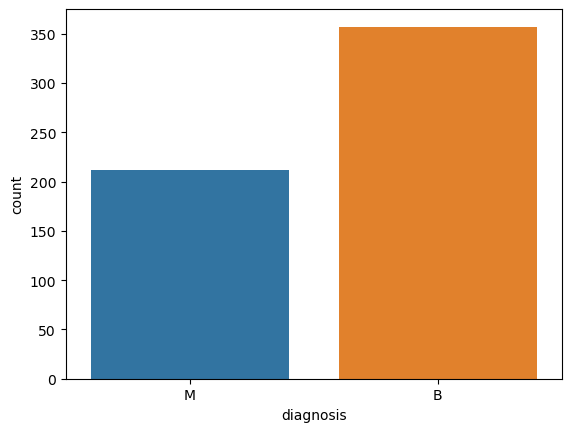

In [10]:
#plotabdo o gráfico com o target
sns.countplot(df.diagnosis);

Verifica-se que a variável está desbalanceada porém não utilizaremos nenhum tipo de manipulação, pois o intuito é mostrar e entender o funcionamento do algoritmo.

Será feito a exclusão das variáveis `id` pois é somente o identificador do paciente e não será necessária sua utilização e `Unnamed: 32` que não tem seus dados definidos.

In [13]:
# excluindo a coluna id
df = df.drop('id', axis=1)

In [33]:
#excluindo a coluna Unnamed: 32
df = df.drop('Unnamed: 32', axis=1)

#### Dividindo do dataset

In [36]:
#dividindo o dataset em variáveis X e y
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [37]:
#fazendo o split dos dados
X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#### Pré processamento dos dados

In [38]:
#padronizando as variáveis 
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
std.fit(X_test)
X_test = std.transform(X_test)

In [39]:
#transformando a variável y em variável numérica em 1 e 0
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Criando o classificador Naive Bayes Gaussian

In [40]:
#aplicando o classificador Naive Bayes Gaussian
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

#### Verificando a assertividade do modelo

In [48]:
print(f' O Score do Naive Bayes Gaussian Classifier é: {(nb.score(X_test, y_test) * 100):.2f}%')

 O Score do Naive Bayes Gaussian Classifier é: 96.49%


#### Conclusão

A assertividade desse modelo ficou em torno de 96,5%, mostrando-se com um alta taxa de assertividade.

Pudemos ver que o algoritmo de classificação pode ser utilizado em vários casos e problemas reais, e pode trazer soluções simples para esses.